In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

from collections import defaultdict

import numpy as np
from matplotlib import pyplot as plt
import pickle

from src.plot_utils import plot_sample
from src.cfd import CFD
from src.cfd_utils import calculate_event_cfd, find_diff_hist_stats

# Load data

In [2]:
# file_name = 'Ntuple_runsampic_166_runtelescope_643_filtered.npz'
# all_events = np.load(f'{PWD}/data/filtered/{file_name}', allow_pickle=True)['arr_0'].flat[0]

# all_events.keys()

In [3]:
# channels = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
channels = [8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

all_events = {}
for channel in channels:
    all_events[channel] = np.load(PWD + f'/data/filtered/channel_{channel}_filtered.npz', allow_pickle=True)['arr_0'].flat[0]
    
all_events.keys()

dict_keys([8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

# Timestamp difference

8...
channel:  8
Best: fraction=0.22, std=0.0693 (mean=-0.1256)


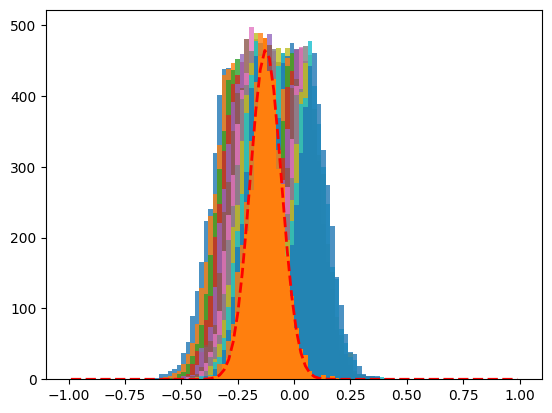

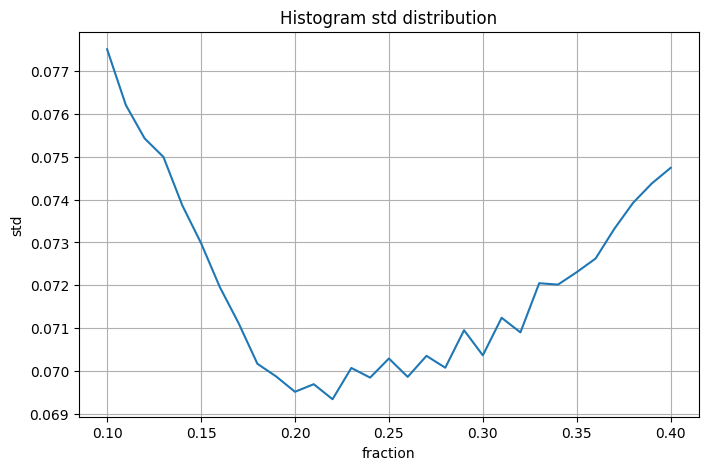

channel:  0
Best: fraction=0.27, std=0.0690 (mean=-0.1539)


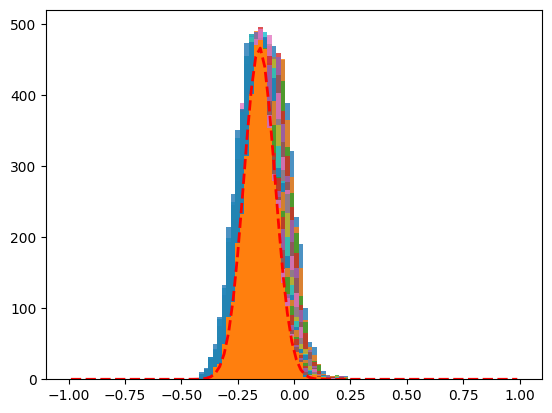

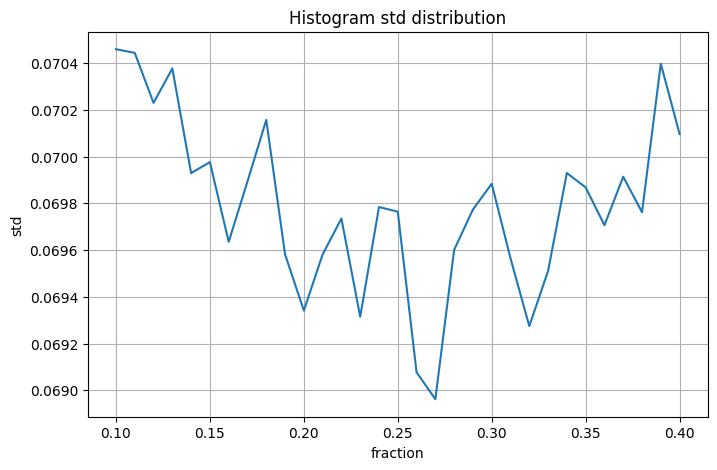

9...
channel:  9
Best: fraction=0.22, std=0.0708 (mean=0.0249)


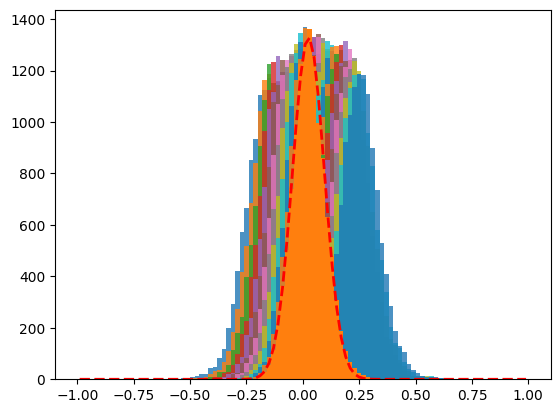

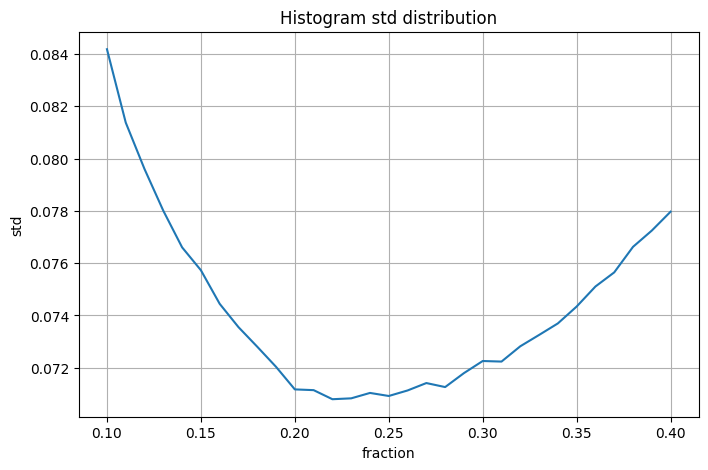

channel:  0
Best: fraction=0.22, std=0.0706 (mean=0.0164)


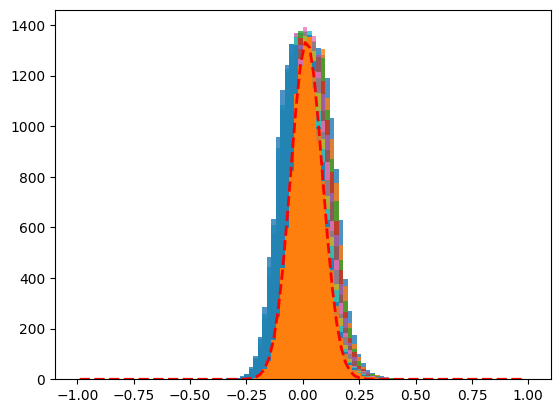

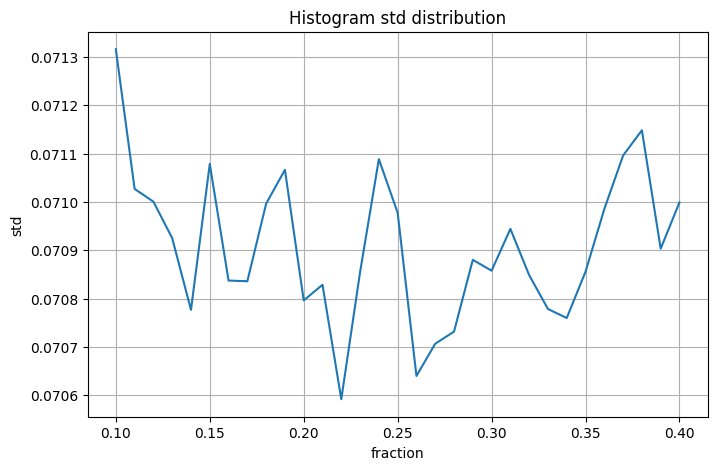

10...
channel:  10
Best: fraction=0.20, std=0.0632 (mean=0.0352)


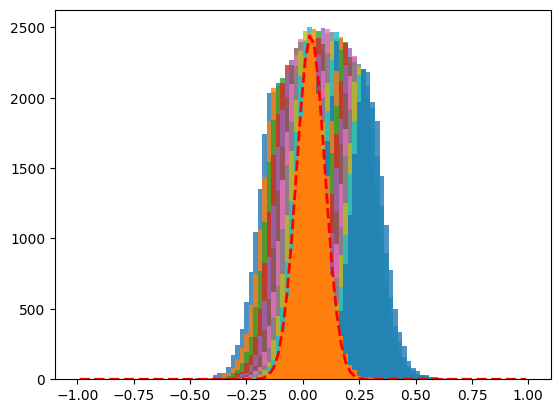

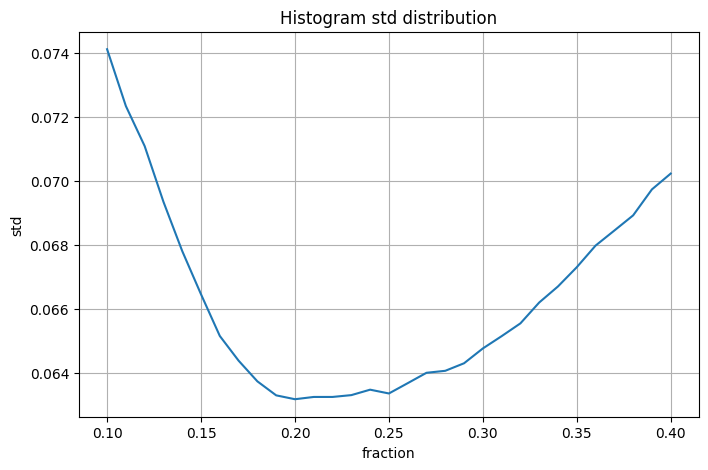

channel:  0
Best: fraction=0.31, std=0.0630 (mean=-0.0082)


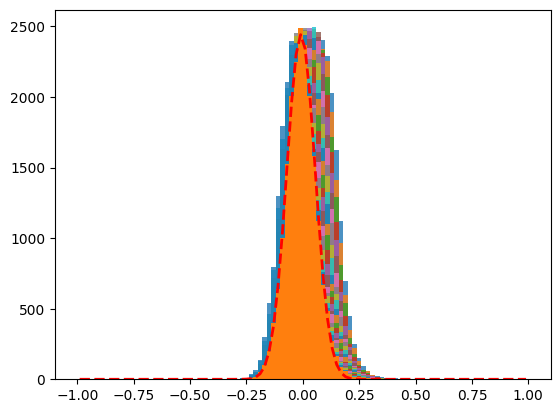

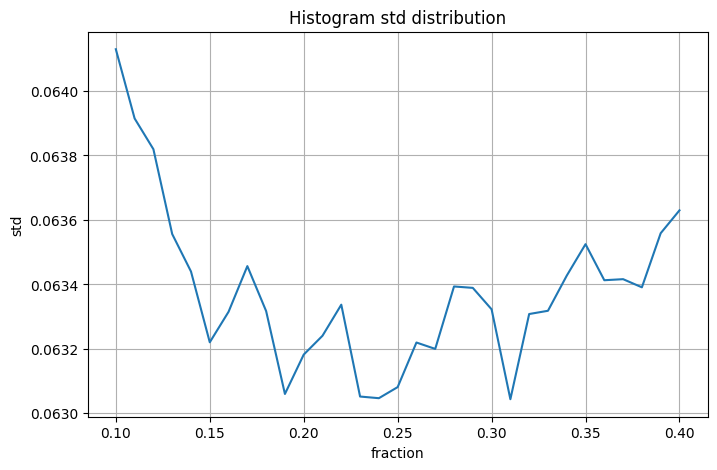

11...
channel:  11
Best: fraction=0.26, std=0.0636 (mean=0.1874)


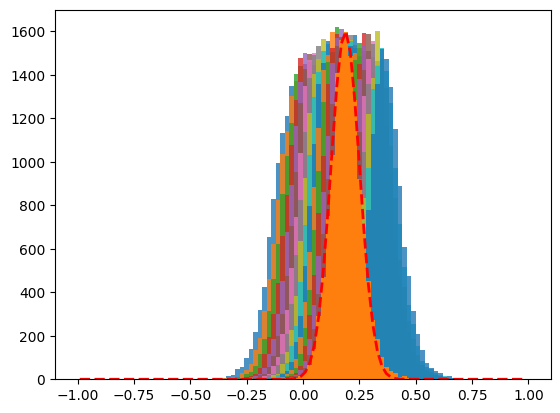

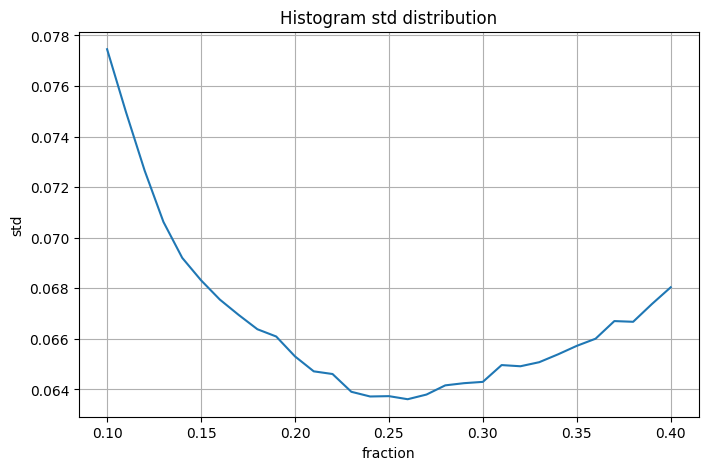

channel:  0
Best: fraction=0.35, std=0.0633 (mean=0.1304)


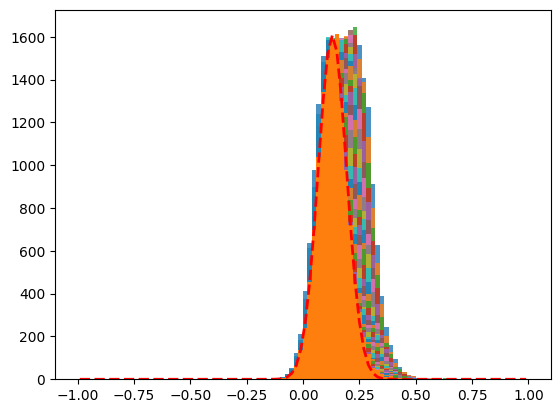

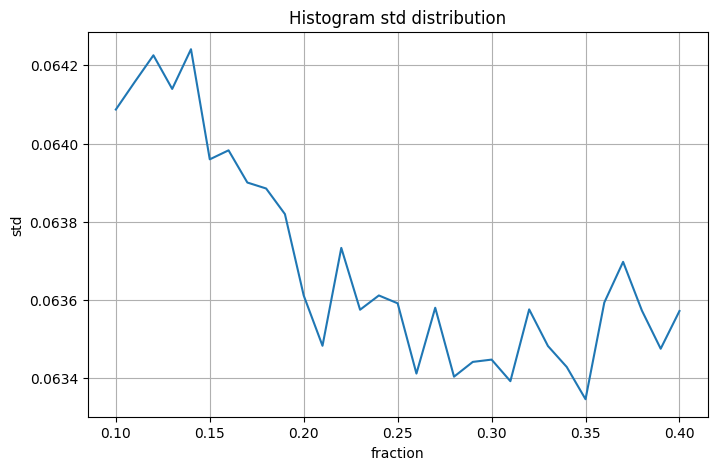

13...
channel:  13
Best: fraction=0.24, std=0.1211 (mean=0.4048)


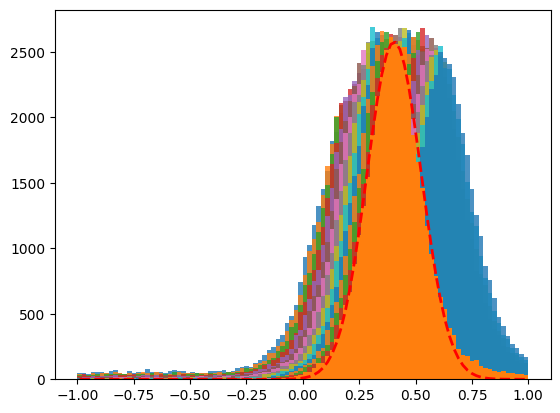

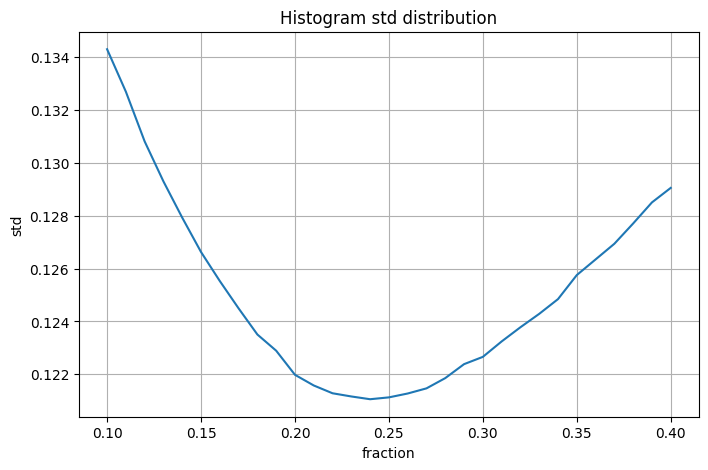

channel:  0
Best: fraction=0.33, std=0.1208 (mean=0.3543)


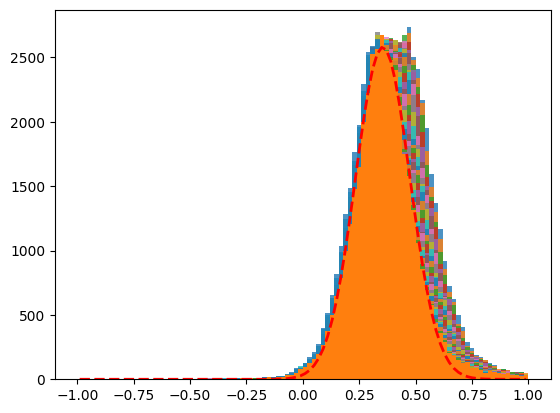

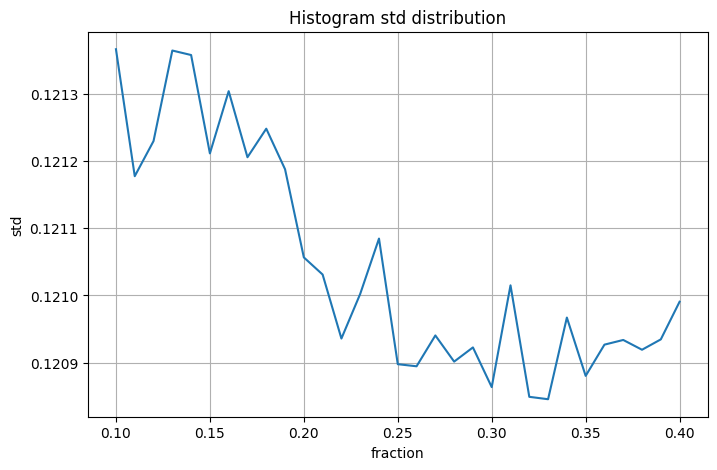

14...
channel:  14
Best: fraction=0.25, std=0.1139 (mean=0.4160)


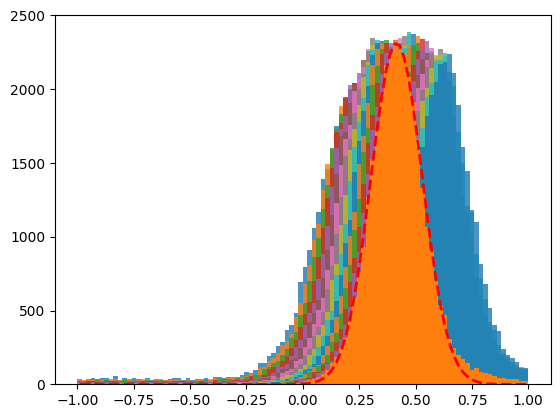

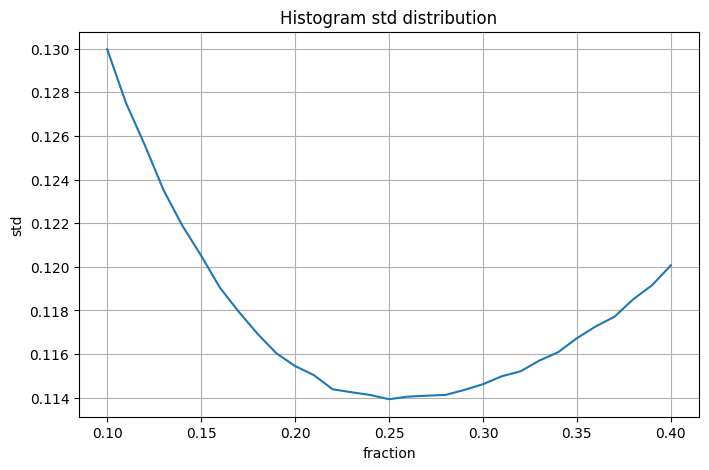

channel:  0
Best: fraction=0.40, std=0.1139 (mean=0.3421)


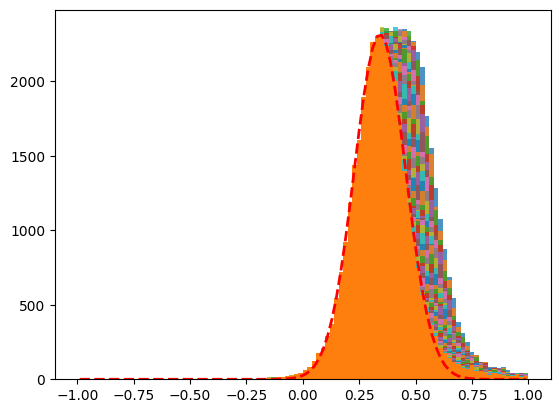

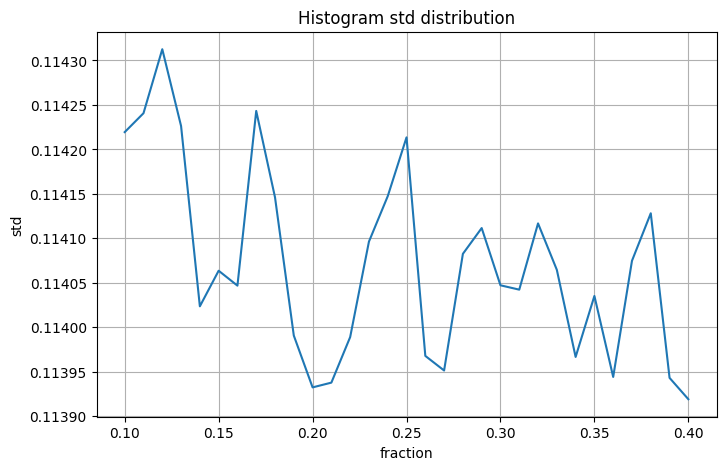

16...
channel:  16
Best: fraction=0.25, std=0.0671 (mean=0.3000)


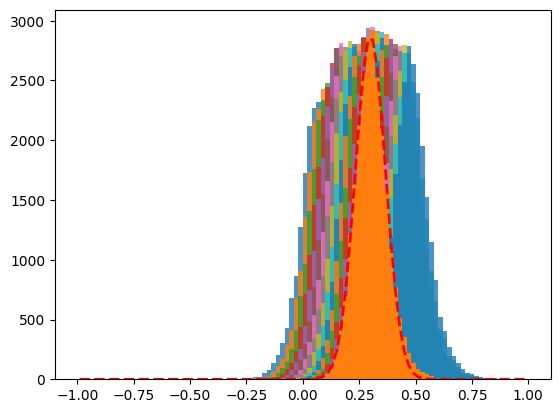

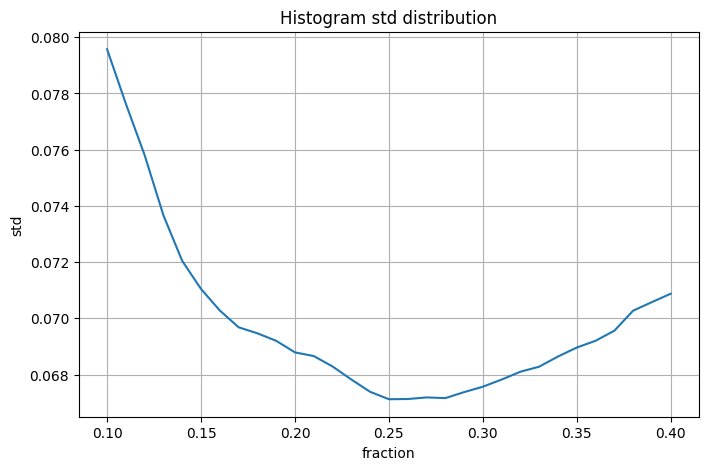

channel:  0
Best: fraction=0.14, std=0.0669 (mean=0.3301)


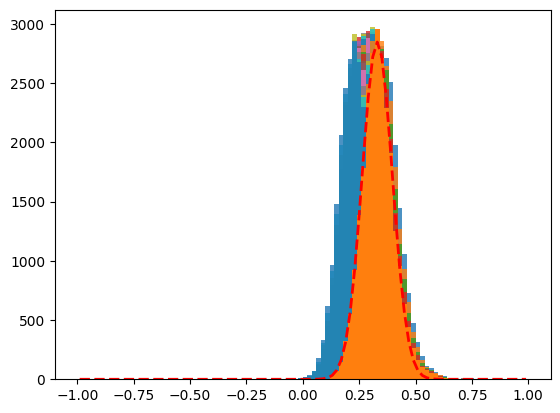

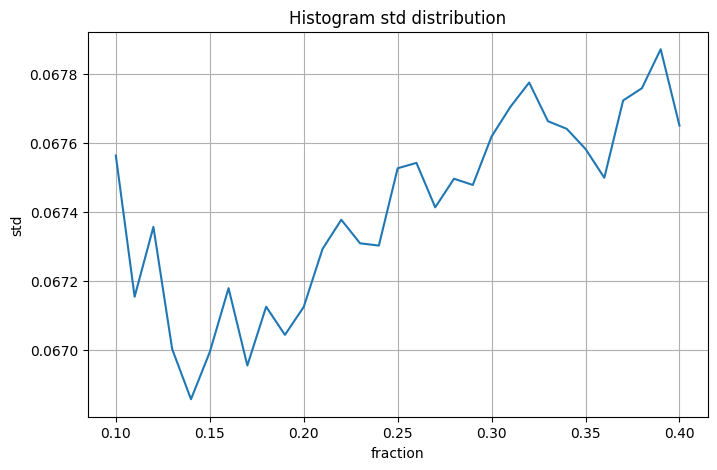

17...
channel:  17
Best: fraction=0.23, std=0.0718 (mean=0.1669)


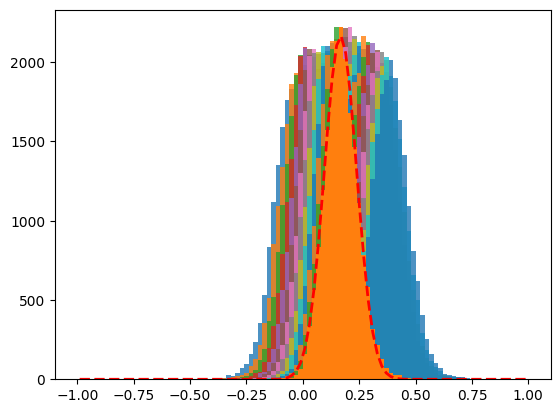

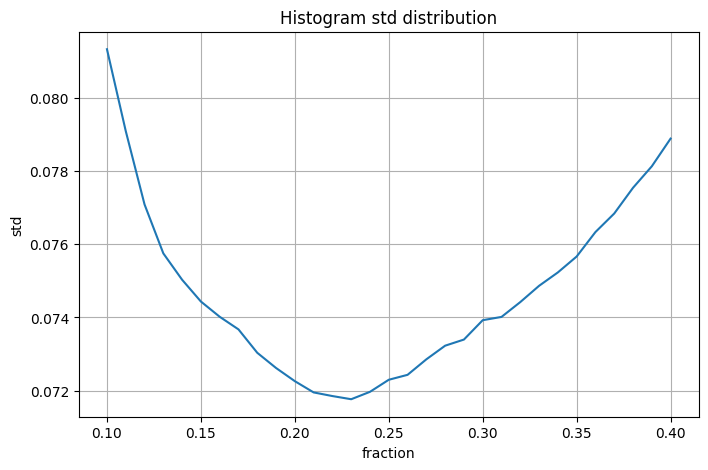

channel:  0
Best: fraction=0.24, std=0.0715 (mean=0.1501)


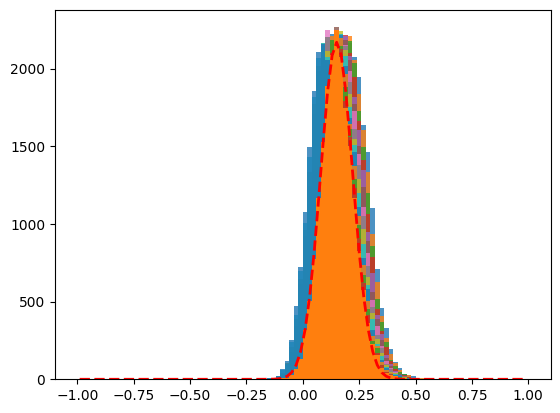

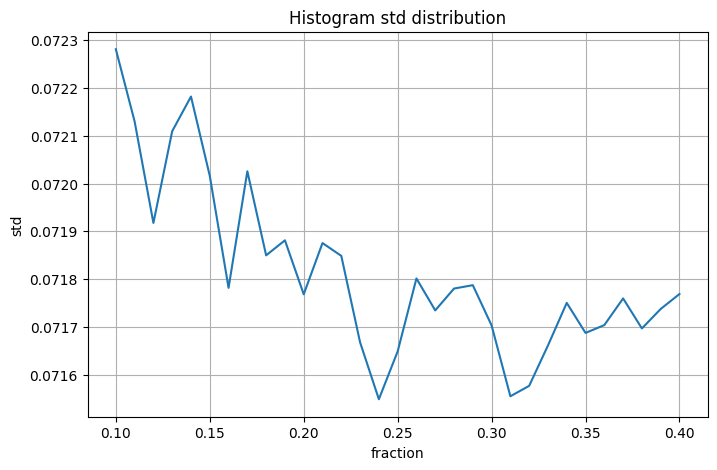

18...
channel:  18
Best: fraction=0.23, std=0.0683 (mean=0.0169)


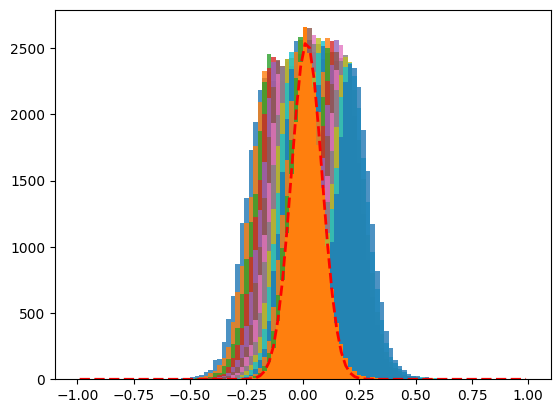

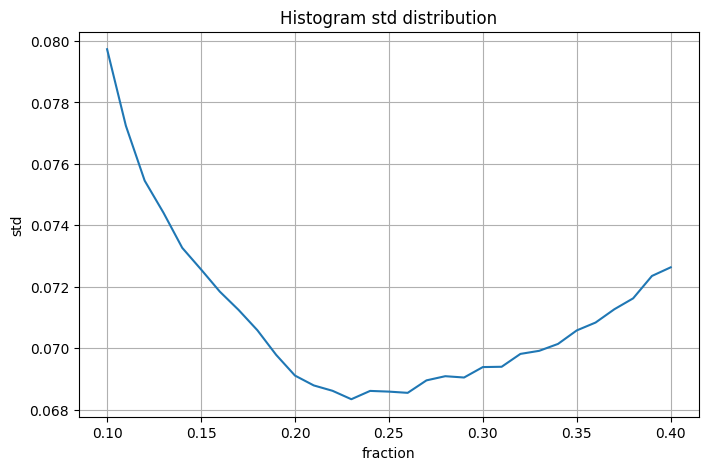

channel:  0
Best: fraction=0.21, std=0.0683 (mean=0.0127)


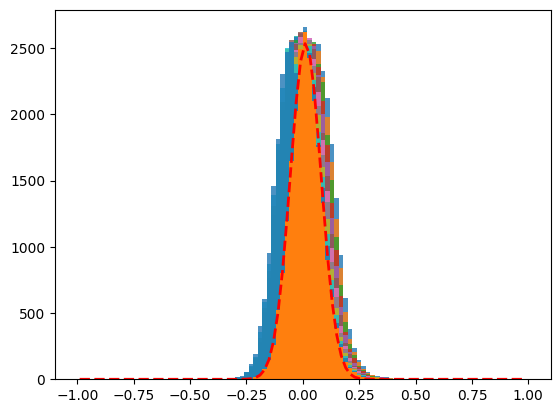

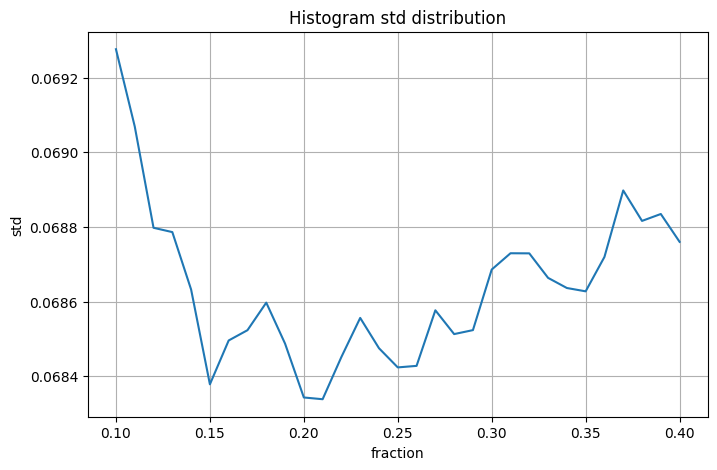

19...
channel:  19
Best: fraction=0.21, std=0.0882 (mean=-0.1238)


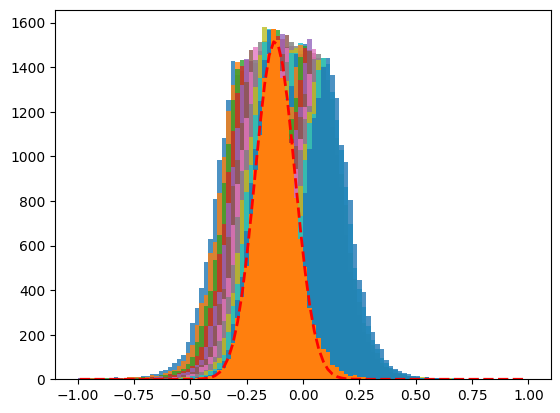

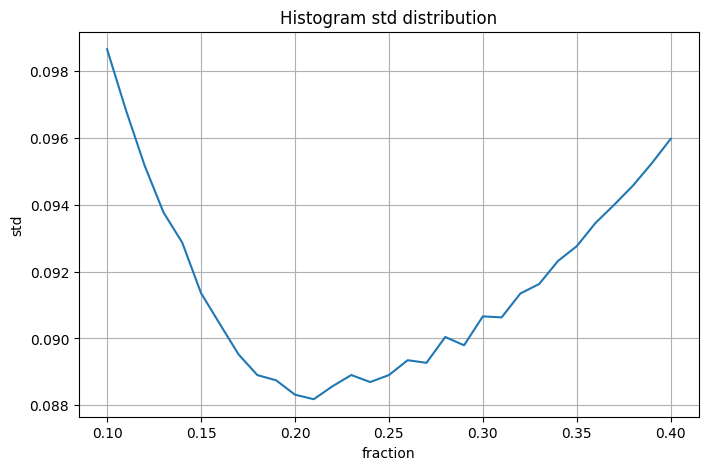

channel:  0
Best: fraction=0.20, std=0.0882 (mean=-0.1238)


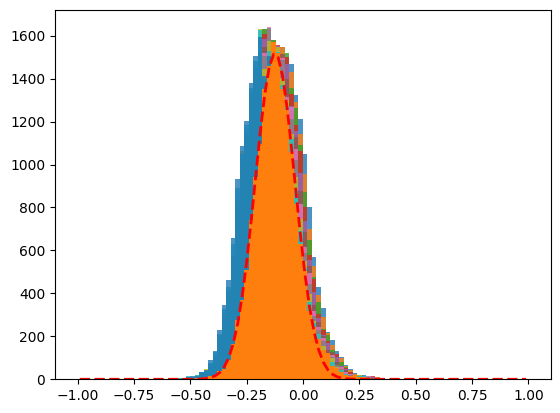

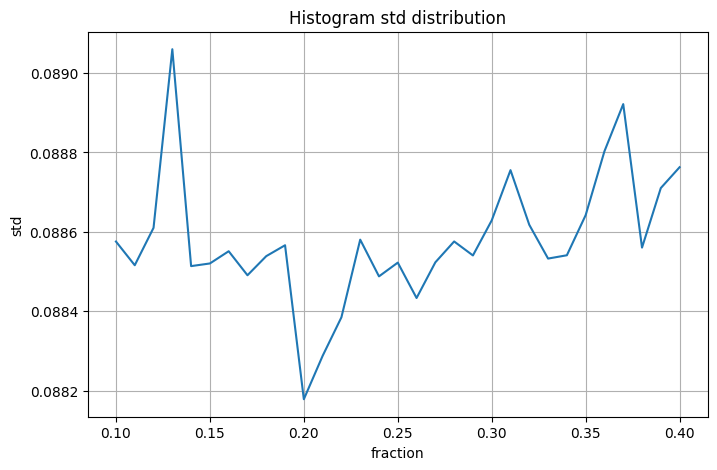

20...
channel:  20
Best: fraction=0.23, std=0.0647 (mean=-0.2916)


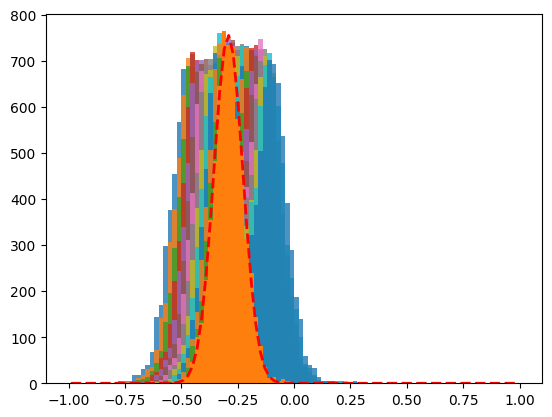

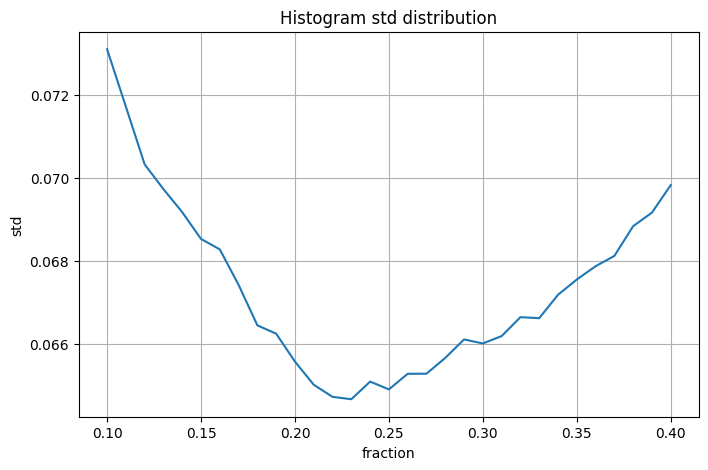

channel:  0
Best: fraction=0.17, std=0.0646 (mean=-0.2774)


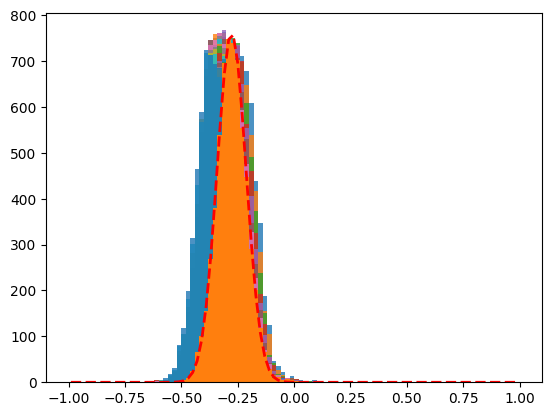

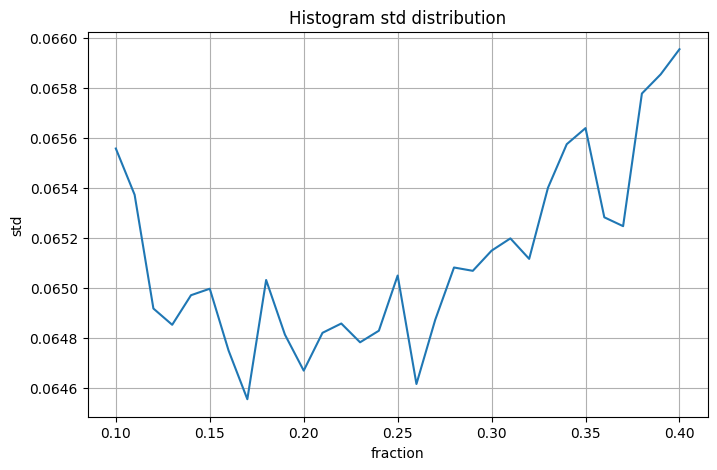

21...
channel:  21
Best: fraction=0.24, std=0.0679 (mean=-0.1892)


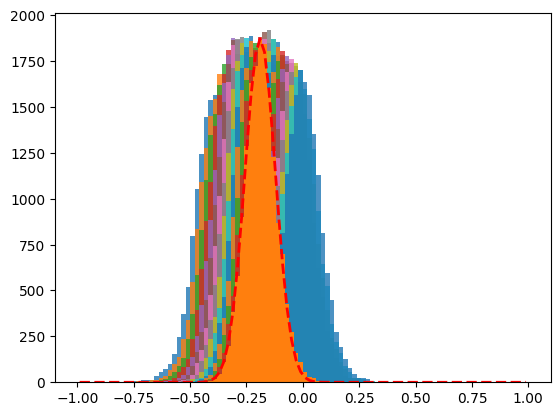

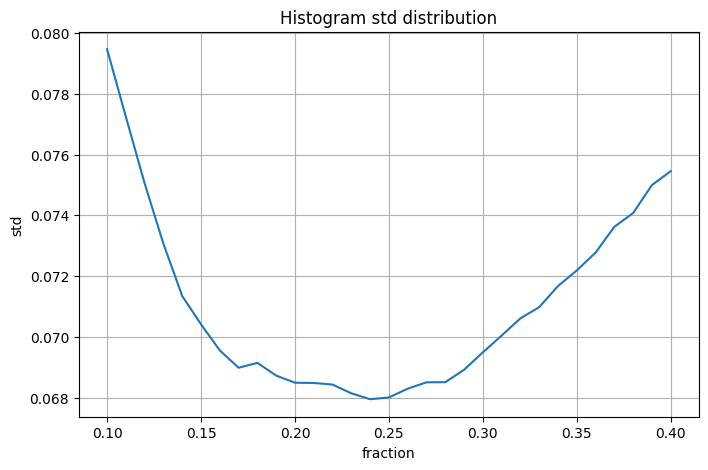

channel:  0
Best: fraction=0.14, std=0.0677 (mean=-0.1589)


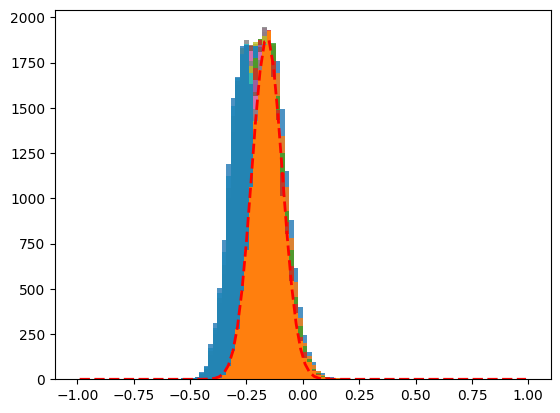

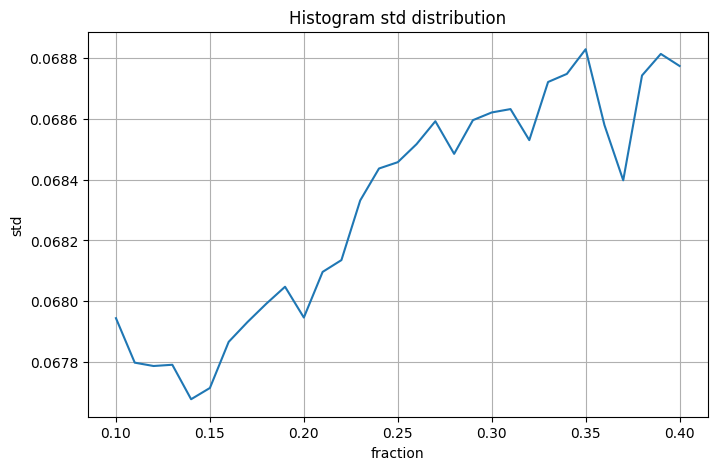

22...
channel:  22
Best: fraction=0.27, std=0.0622 (mean=-0.1578)


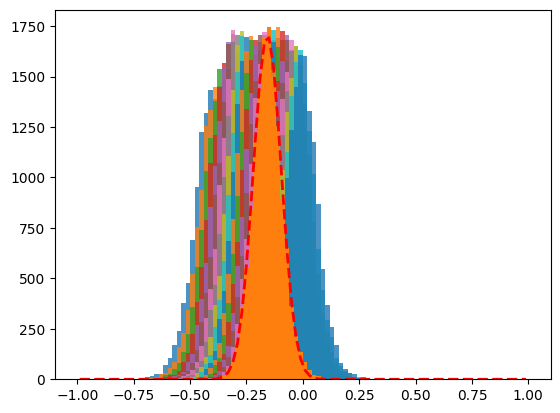

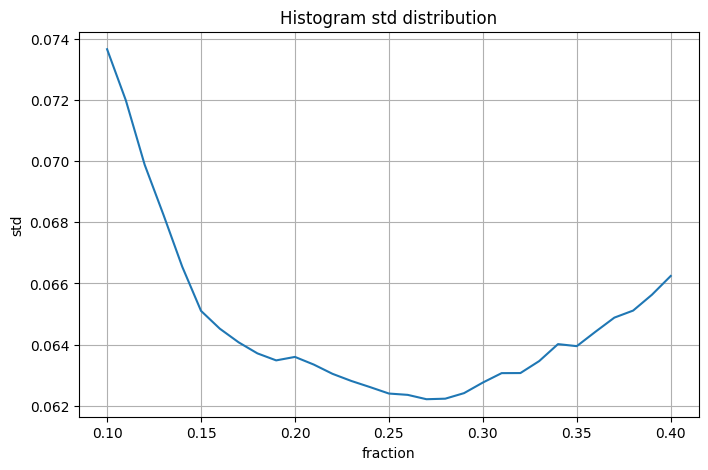

channel:  0
Best: fraction=0.23, std=0.0621 (mean=-0.1704)


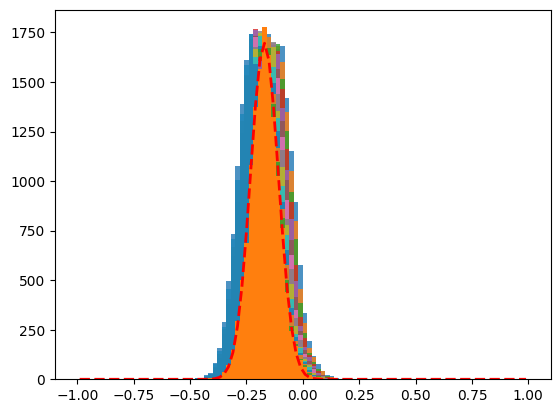

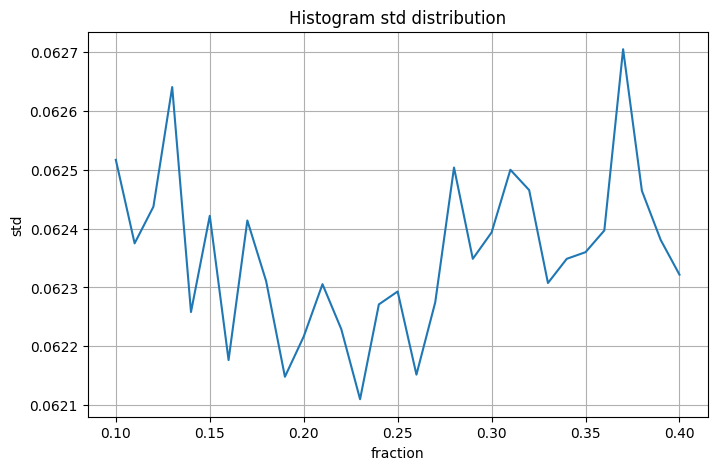

23...
channel:  23
Best: fraction=0.25, std=0.0625 (mean=-0.1729)


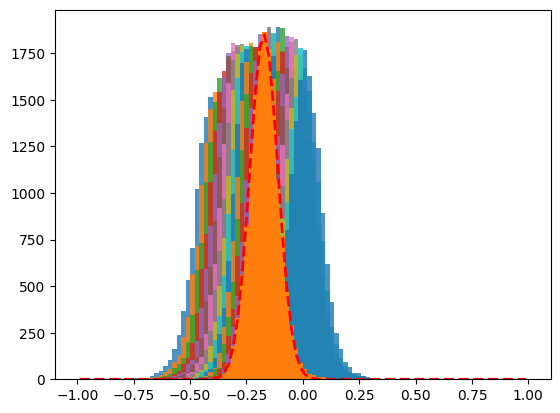

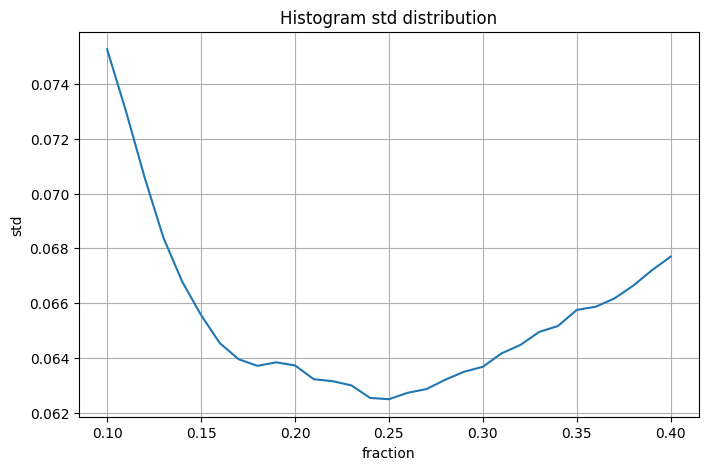

channel:  0
Best: fraction=0.13, std=0.0623 (mean=-0.1373)


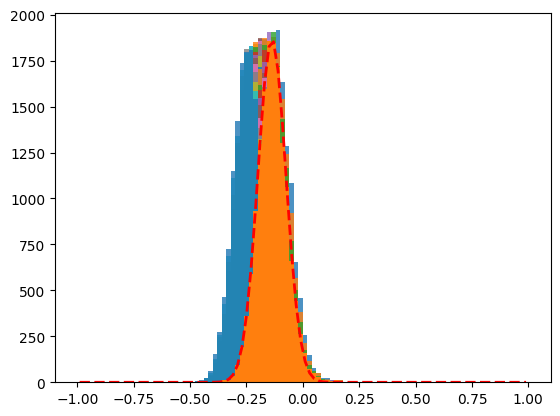

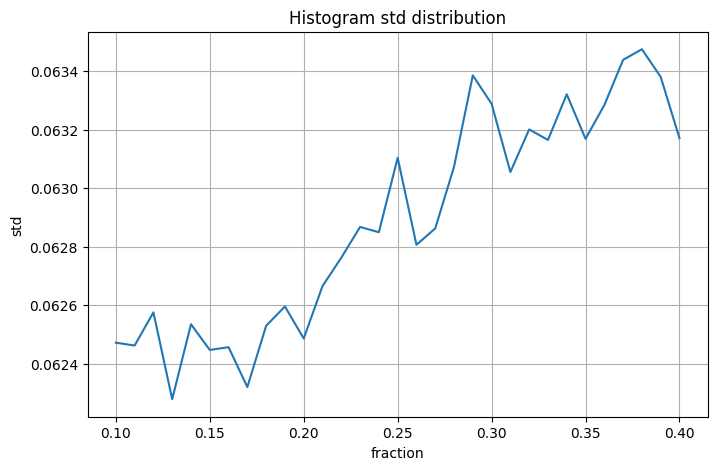

24...
channel:  24
Best: fraction=0.22, std=0.0916 (mean=-0.0596)


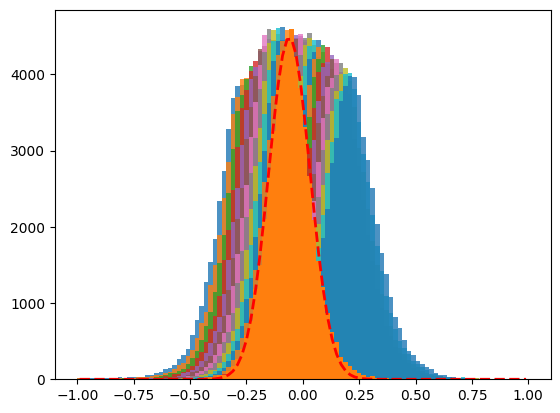

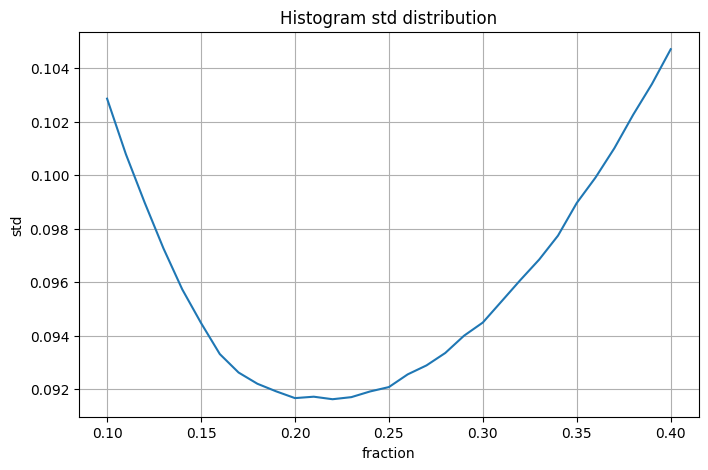

channel:  0
Best: fraction=0.11, std=0.0914 (mean=-0.0108)


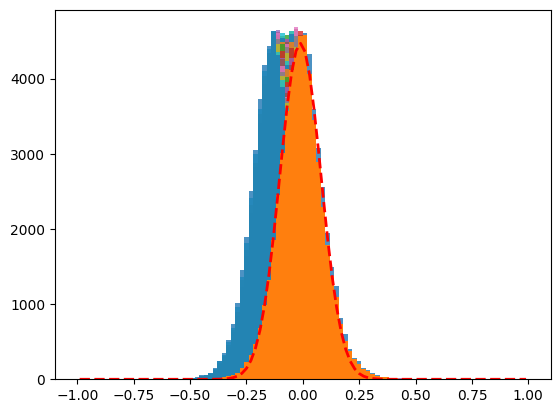

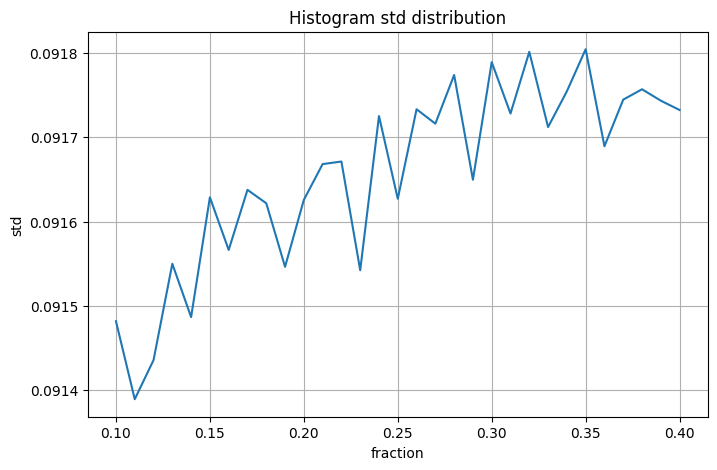

25...
channel:  25
Best: fraction=0.24, std=0.1046 (mean=-0.0398)


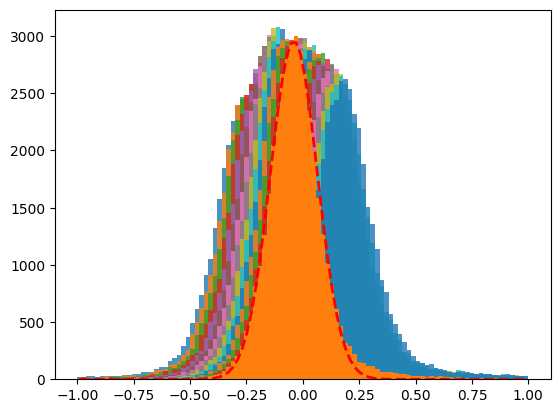

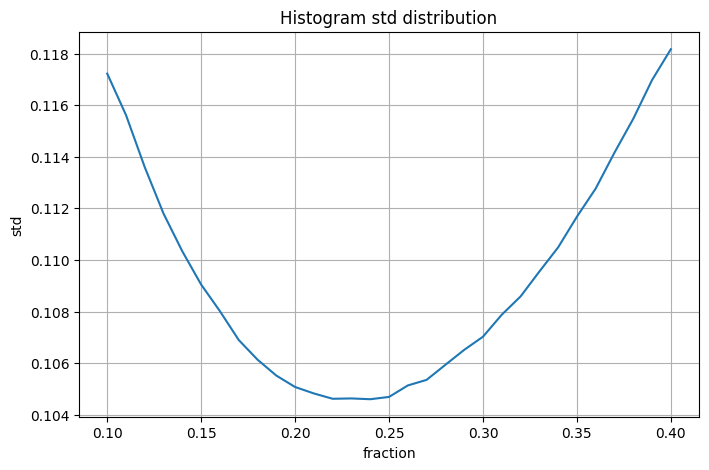

channel:  0
Best: fraction=0.33, std=0.1045 (mean=-0.0903)


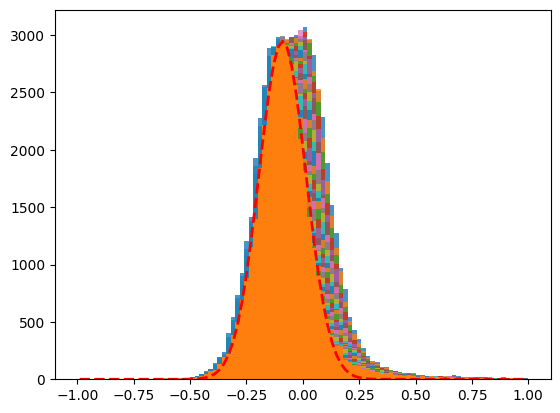

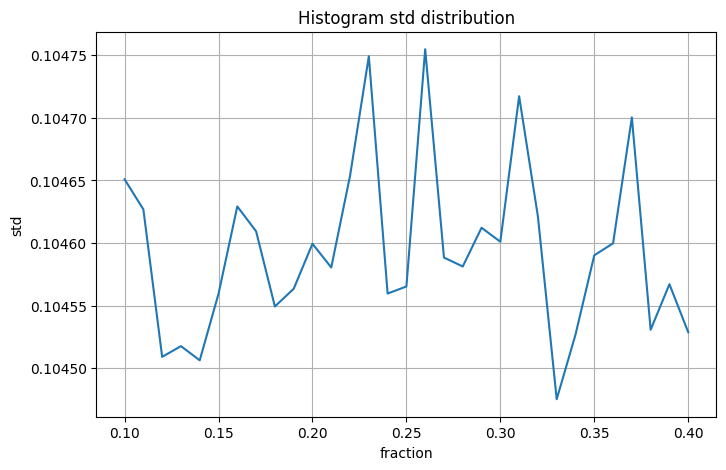

26...
channel:  26
Best: fraction=0.26, std=0.1178 (mean=-0.0915)


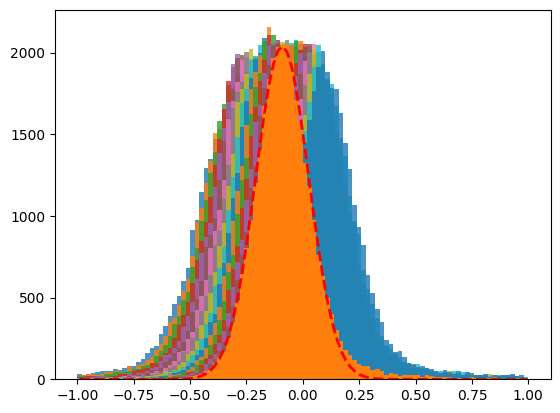

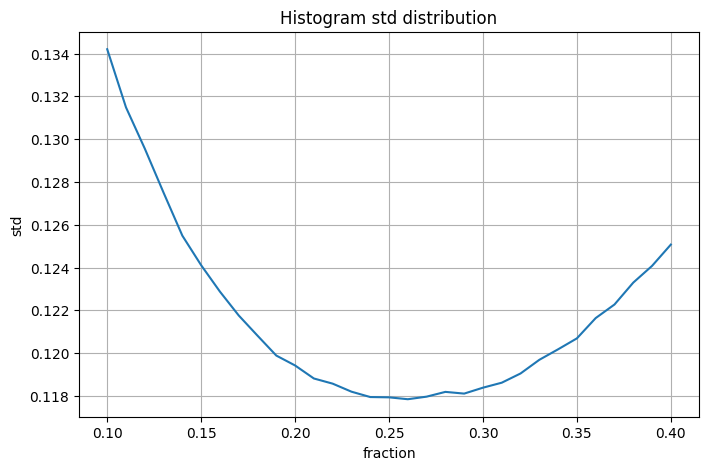

channel:  0
Best: fraction=0.32, std=0.1178 (mean=-0.1389)


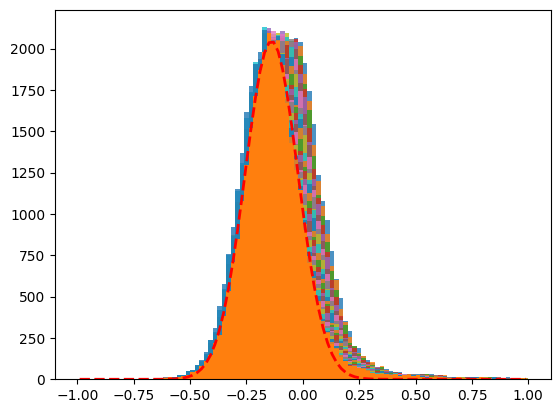

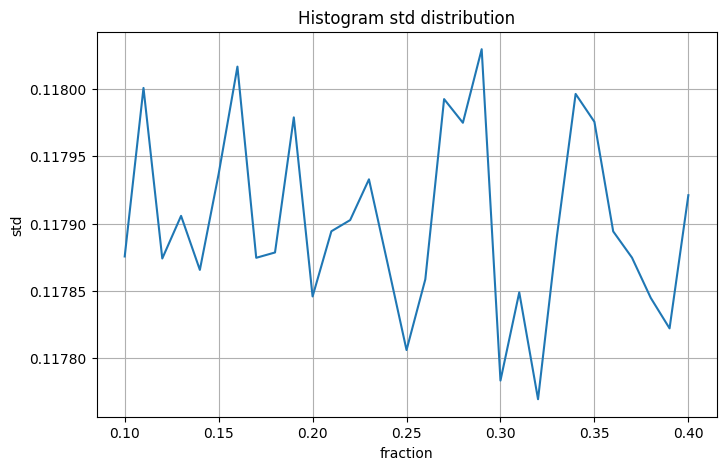

27...
channel:  27
Best: fraction=0.23, std=0.1067 (mean=-0.1694)


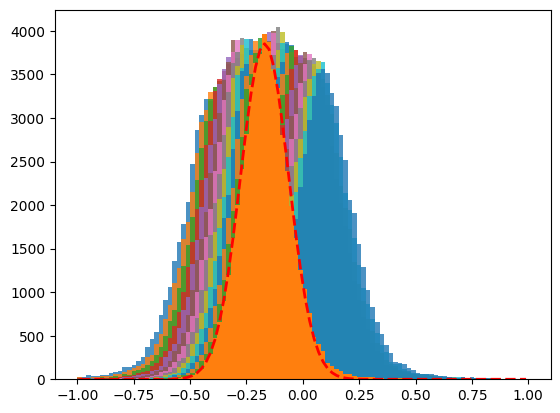

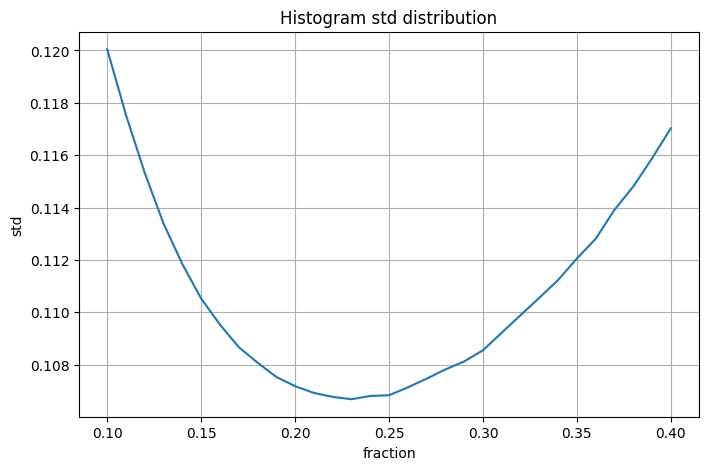

channel:  0
Best: fraction=0.11, std=0.1065 (mean=-0.1201)


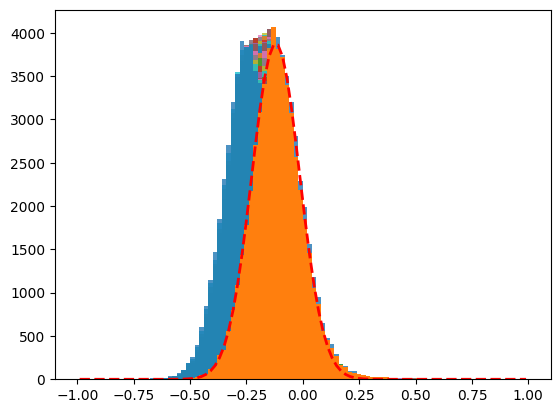

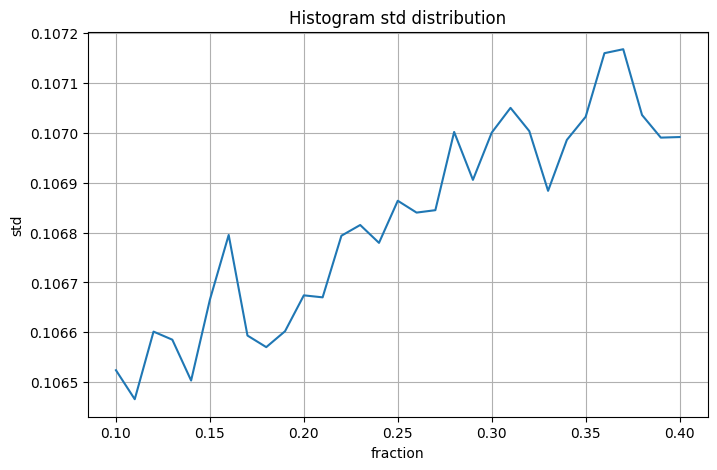

28...
channel:  28
Best: fraction=0.22, std=0.0752 (mean=-0.3009)


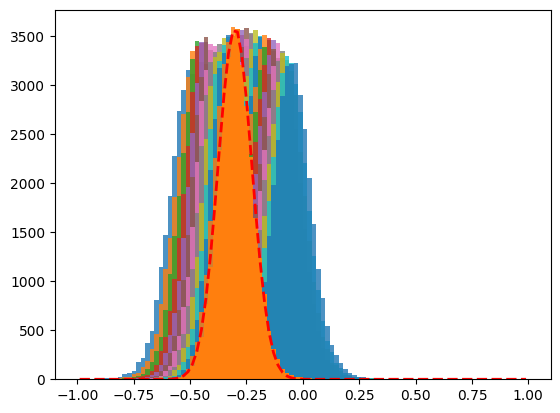

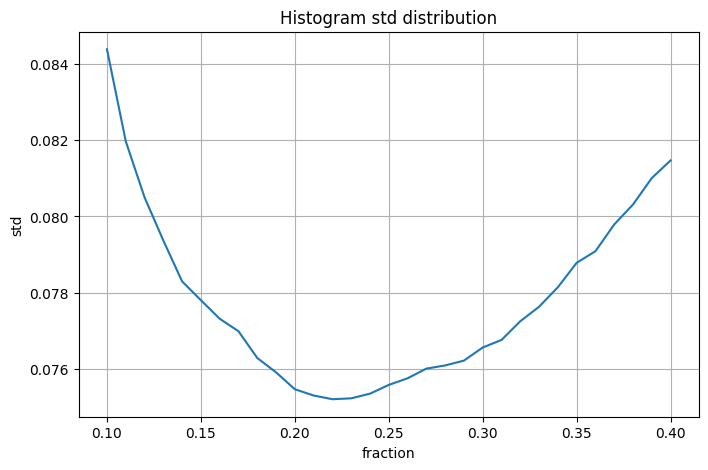

channel:  0
Best: fraction=0.23, std=0.0752 (mean=-0.3137)


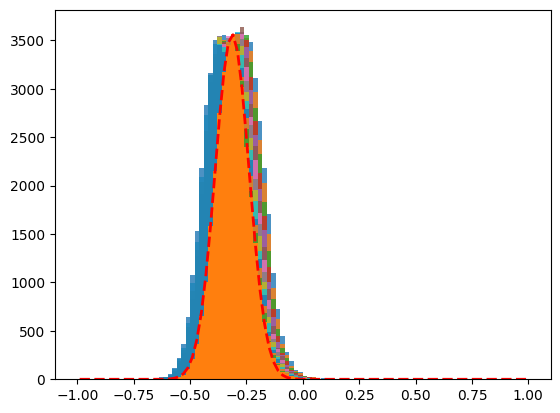

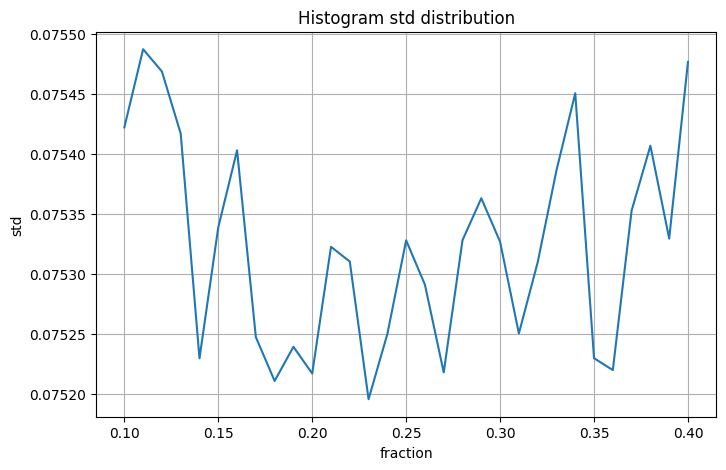

29...
channel:  29
Best: fraction=0.28, std=0.0673 (mean=-0.3256)


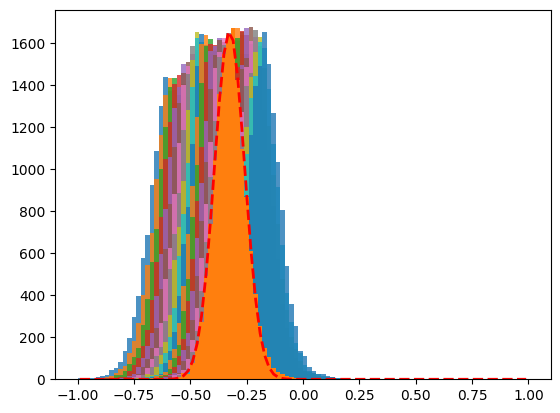

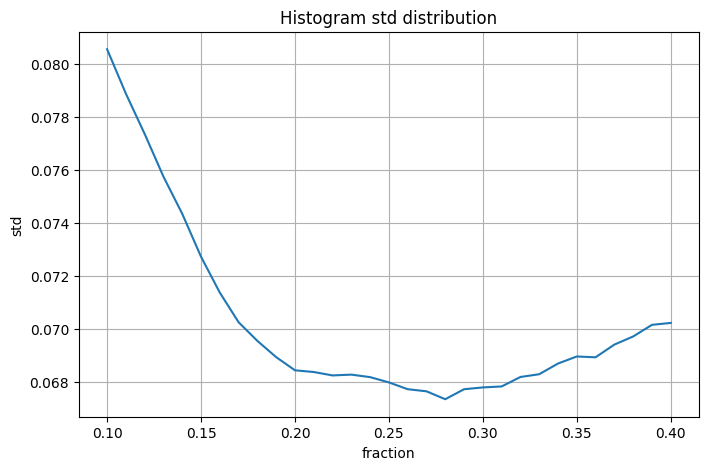

channel:  0
Best: fraction=0.20, std=0.0673 (mean=-0.3256)


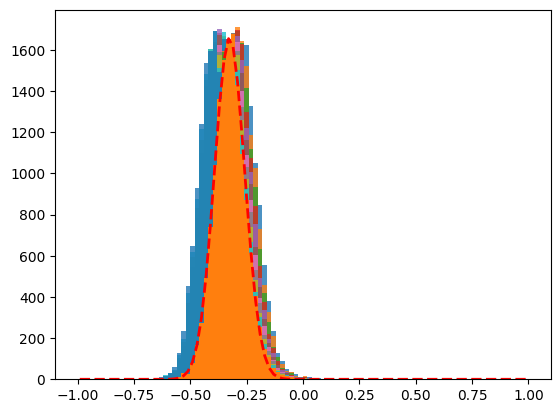

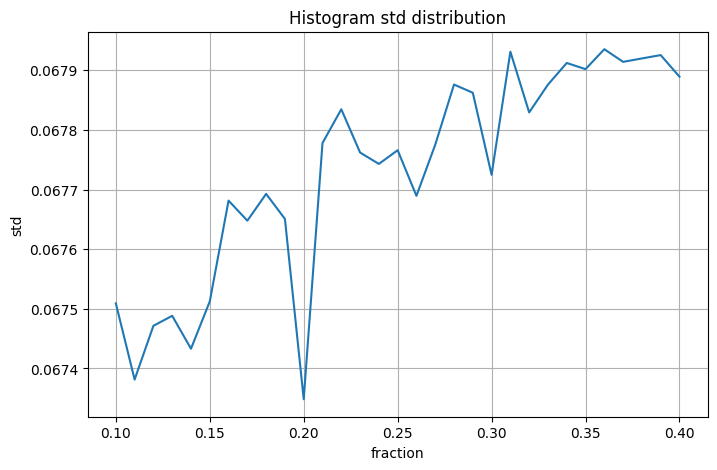

30...
channel:  30
Best: fraction=0.26, std=0.0721 (mean=-0.4334)


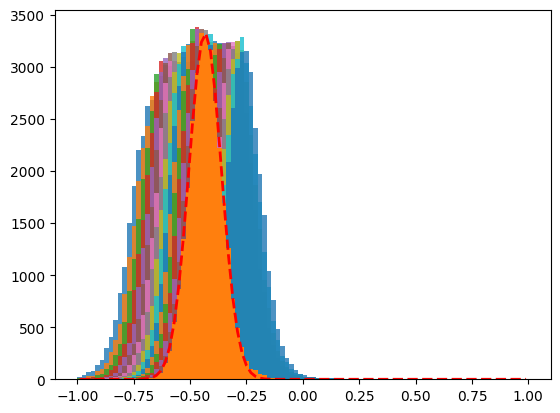

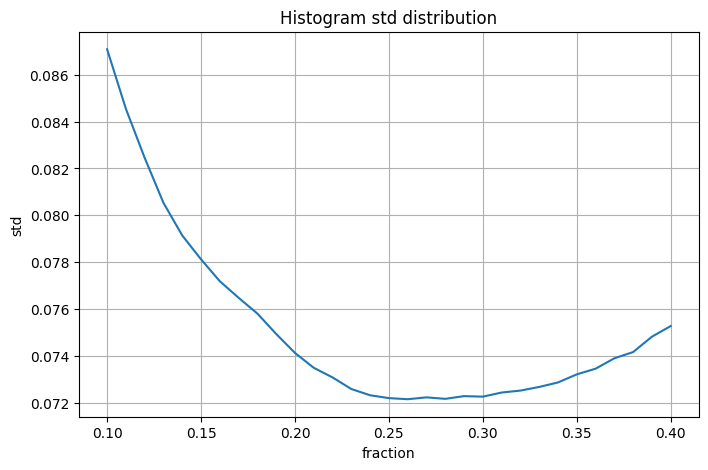

channel:  0
Best: fraction=0.16, std=0.0720 (mean=-0.4141)


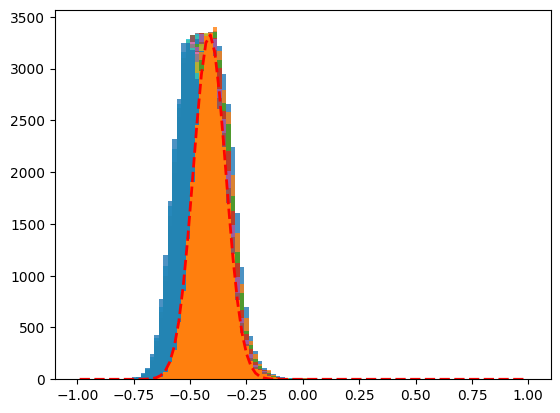

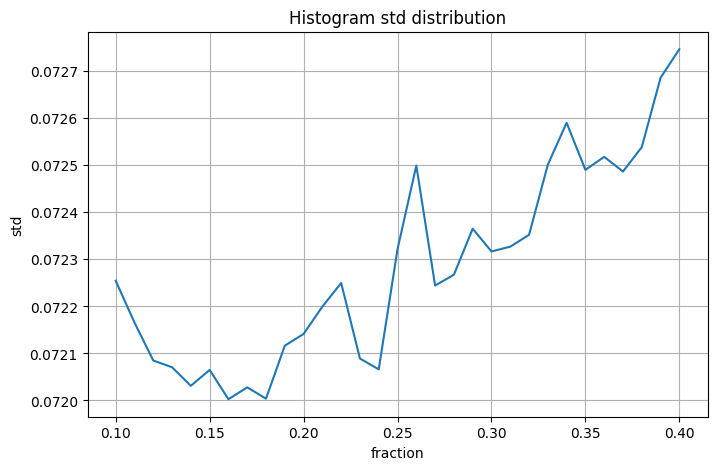

31...
channel:  31
Best: fraction=0.27, std=0.0776 (mean=-0.4845)


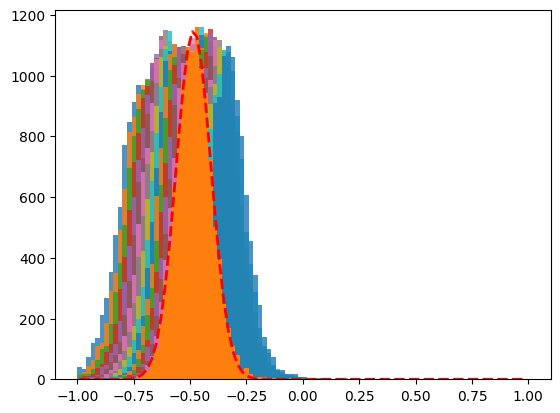

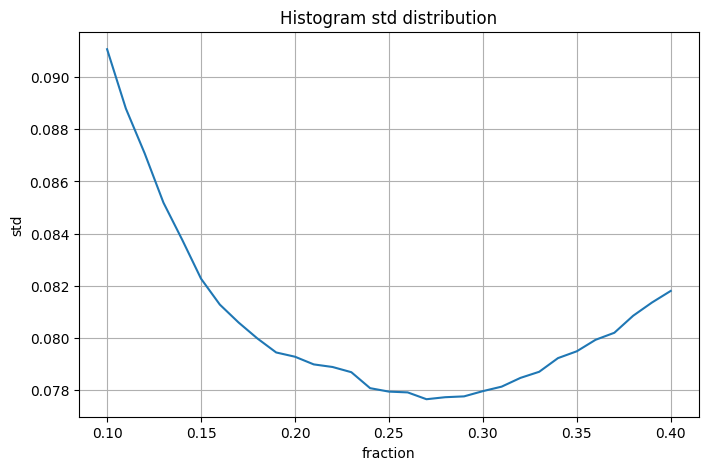

channel:  0
Best: fraction=0.16, std=0.0775 (mean=-0.4653)


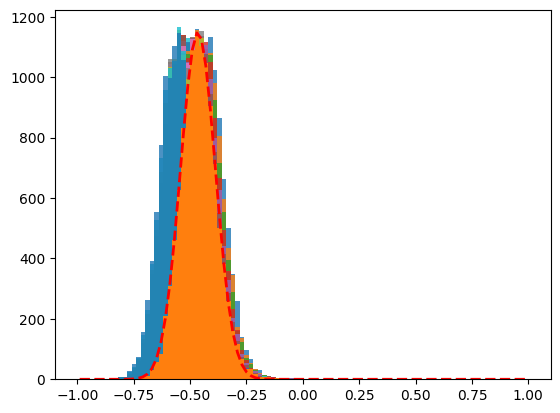

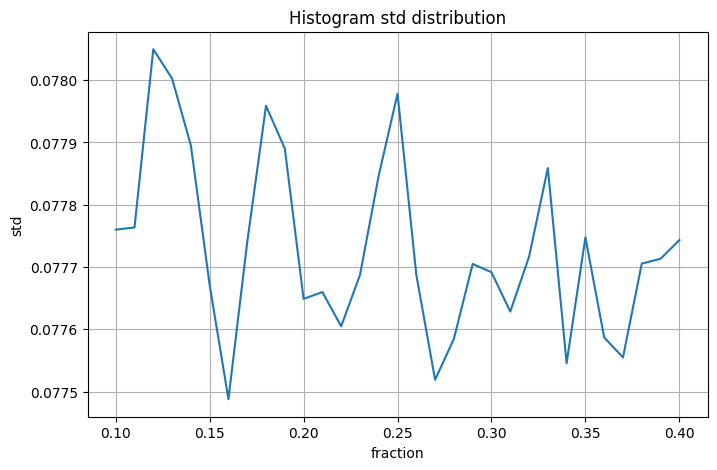

In [4]:
X_RANGE = np.arange(0.1, 0.4, 0.01)
best_fractions = defaultdict(dict)

for channel, events in all_events.items():
    print(f'{channel}...')
    cfd = [CFD(), CFD()]
    
    cfd[0].fraction = 0.2
    for y, c in reversed(list(enumerate([0, channel]))):
        stds = []
        means = []
        print("channel: ",c)
        for frac in X_RANGE:
            cfd[y].fraction = frac
            mean, std = find_diff_hist_stats(cfd, events, show=False, hist_range=(-1., 1.), hist_alpha=0.8, hist_label=f'{frac:0.2f}', plot_gauss=False, log=False)
            # print(f'fraction={frac:0.2f}, std={std:0.4f}')
            means.append(mean)
            stds.append(std)
            # plt.close()
        
        stds = np.array(stds)
        best_idx = np.argmin(stds)
        print(f'Best: fraction={X_RANGE[best_idx]:0.2f}, std={stds[best_idx]:0.4f} (mean={means[best_idx]:0.4f})')
        best_fractions[channel][c] = X_RANGE[best_idx]

        cfd[y].fraction = best_fractions[channel][c]
        find_diff_hist_stats(cfd, events, show=True, hist_range=(-1., 1.), hist_label=f'{frac:0.2f}', plot_gauss=True)

        plt.figure(figsize=(8, 5))
        plt.plot(X_RANGE, stds)
        plt.title('Histogram std distribution')
        plt.xlabel('fraction')
        plt.ylabel('std')
        plt.grid()
        plt.show()
    
    print('=======================================================================================================')

In [5]:
with open(PWD + '/data/misc/best_cfd_fractions.pkl', 'wb') as file:
    pickle.dump(best_fractions, file)

In [6]:
with open(PWD + '/data/misc/best_cfd_fractions.pkl', 'rb') as file:
    best_fractions = pickle.load(file)
    
best_fractions

defaultdict(dict,
            {8: {8: 0.21999999999999995, 0: 0.2699999999999999},
             9: {9: 0.21999999999999995, 0: 0.21999999999999995},
             10: {10: 0.19999999999999996, 0: 0.30999999999999994},
             11: {11: 0.2599999999999999, 0: 0.34999999999999987},
             13: {13: 0.23999999999999994, 0: 0.32999999999999985},
             14: {14: 0.24999999999999992, 0: 0.3999999999999998},
             16: {16: 0.24999999999999992, 0: 0.13999999999999999},
             17: {17: 0.22999999999999995, 0: 0.23999999999999994},
             18: {18: 0.22999999999999995, 0: 0.20999999999999996},
             19: {19: 0.20999999999999996, 0: 0.19999999999999996},
             20: {20: 0.22999999999999995, 0: 0.16999999999999998},
             21: {21: 0.23999999999999994, 0: 0.13999999999999999},
             22: {22: 0.2699999999999999, 0: 0.22999999999999995},
             23: {23: 0.24999999999999992, 0: 0.13},
             24: {24: 0.21999999999999995, 0: 0.11},
